In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, fbeta_score, precision_score, recall_score, accuracy_score,auc,roc_curve

### PREPARE DATA

In [2]:
X = np.arange(2,29)
X = X.reshape(-1,1)
Y = np.array([0,0,0,0,0,1,1,1,1,0,1,0,1,0,0,0,1,1,1,0,0,1,0,0,1,1,1])
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.7,random_state=42)
print(len(X_train))
print(len(X_test))

18
9


### SELECT & TRAIN MODEL

In [3]:
LoR = LogisticRegression()
LoR.fit(X_train,Y_train)

LogisticRegression()

### TEST MODEL

In [4]:
Yp_train = LoR.predict(X_train)
Yp_train_pro = LoR.predict_proba(X_train)
print(Yp_train_pro)
print(Yp_train)
print(Y_train)
print()
Yp_test = LoR.predict(X_test)
Yp_test_pro = LoR.predict_proba(X_test)
print(Yp_test_pro)
print(Yp_test)
print(Y_test)

[[0.45639784 0.54360216]
 [0.67158466 0.32841534]
 [0.64548382 0.35451618]
 [0.63657775 0.36342225]
 [0.66299195 0.33700805]
 [0.54326447 0.45673553]
 [0.47565854 0.52434146]
 [0.65429016 0.34570984]
 [0.44681256 0.55318744]
 [0.46601553 0.53398447]
 [0.51434029 0.48565971]
 [0.43726666 0.56273334]
 [0.49499192 0.50500808]
 [0.61848702 0.38151298]
 [0.59073786 0.40926214]
 [0.55285101 0.44714899]
 [0.50466786 0.49533214]
 [0.62757704 0.37242296]]
[1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0]
[1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1]

[[0.60931324 0.39068676]
 [0.56239841 0.43760159]
 [0.60006151 0.39993849]
 [0.48531974 0.51468026]
 [0.680064   0.319936  ]
 [0.58134849 0.41865151]
 [0.53364578 0.46635422]
 [0.524002   0.475998  ]
 [0.57189982 0.42810018]]
[0 0 0 1 0 0 0 0 0]
[1 0 0 1 0 0 1 1 1]


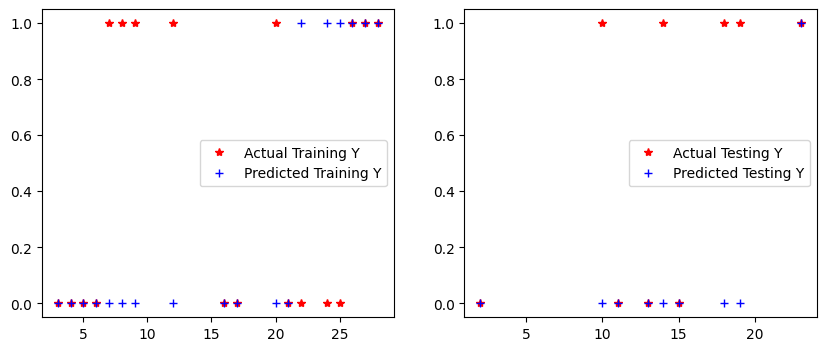

In [5]:
fig1, (sub1,sub2) = plt.subplots(ncols=2,figsize=(10,4))
sub1.plot(X_train,Y_train,'r*',label='Actual Training Y')
sub1.plot(X_train,Yp_train,'b+',label='Predicted Training Y')
sub1.legend(loc=0)

sub2.plot(X_test,Y_test,'r*',label='Actual Testing Y')
sub2.plot(X_test,Yp_test,'b+',label='Predicted Testing Y')
sub2.legend(loc=5)

### EVALUATE MODEL

##### Confusion Matrix

In [6]:
cm = confusion_matrix(Y_test,Yp_test)
print(cm)
print('TRUE NEGATIVES:',cm[0,0])
print('FALSE POSITIVES:',cm[0,1])
print('FALSE NEGATIVES',cm[1,0])
print('TRUE POSITIVES:',cm[1,1])

# hàng ngang bên trên là predicted values
# hàng dọc bên trái là actual values 

[[4 0]
 [4 1]]
TRUE NEGATIVES: 4
FALSE POSITIVES: 0
FALSE NEGATIVES 4
TRUE POSITIVES: 1


In [7]:
acc1 = accuracy_score(Y_train,Yp_train)
acc2 = accuracy_score(Y_test,Yp_test)
print('TRAINING ACCURACY_SCORE:',acc1)
print(Yp_train)
print(Y_train)
print()
print('TESTING ACCURACY_SCORE:',acc2)
print(Yp_test)
print(Y_test)

# accuracy_score = (TN + TP) / (TN + TP + FP + FN)

TRAINING ACCURACY_SCORE: 0.5555555555555556
[1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0]
[1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1]

TESTING ACCURACY_SCORE: 0.5555555555555556
[0 0 0 1 0 0 0 0 0]
[1 0 0 1 0 0 1 1 1]


In [8]:
report = classification_report(Y_test,Yp_test)
print(report)

# precision : true positives compared to predicted positives  -- precision = TP / (TP + FP)
#           => liệu prediction of positives có chuẩn không?

# recall/sensitivity/TPR : true positives compared to actual positives -- recall/sensitivity/TPR = TP / (TP + FN)
#           => liệu prediction of positives có đúng nhiều không khi so với actual positives?

# specificity : true negatives compared to actual negatives -- specificity = TN / (TN + FP)
#           => liệu prediction of negatives có đúng nhiều không khi so với actual negatives?

# FPR : false positives compared to actual negatives -- FPR = FP / (TN + FP) = 1 - specificity
#           liệu prediction of negatives có sai nhiều không khi so với actual negatives?

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         4
           1       1.00      0.20      0.33         5

    accuracy                           0.56         9
   macro avg       0.75      0.60      0.50         9
weighted avg       0.78      0.56      0.48         9



In [9]:
# f1_score : khó mà để cả precision & recall cao khi 2 metrics này ngược chiều -> sinh ra 1 metric mới để đánh giá

# f1_score = 2.(precision.recall) / (precision + recall) nằm trong khoảng [0,1]

# f_beta = (1 + b**2).(precision.recall) / (b**2.precision + recall)
    # coi trọng precision -> chọn b < 1
    # coi trọng recall -> chọn b > 1
    # coi trọng ngang nhau -> b = 1 (chính là f1_score)

##### ROC curve &  AUC

Text(0, 0.5, 'True Positive Rate')

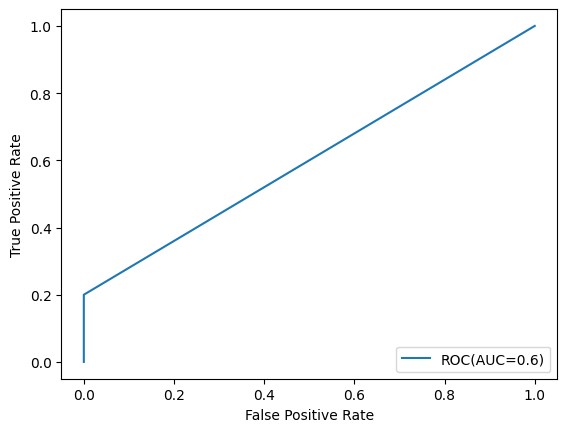

In [10]:
fpr, tpr, _ = roc_curve(Y_test,Yp_test)
auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label='ROC(AUC={})'.format(auc))
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')